# Correlation between entropy/FD metrics

https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.ColoredNoise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import entropy as ent
import matplotlib.pyplot as plt
import stochastic.processes.noise as sn
sns.set(font_scale=1.25)

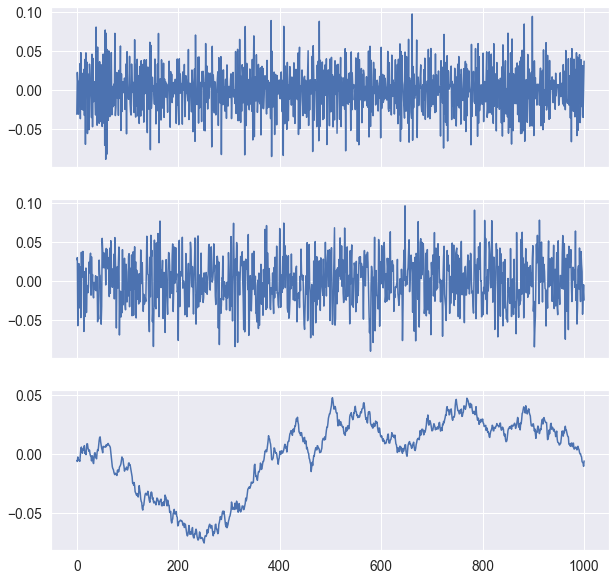

In [2]:
# Generate time-series with increasing B exponent
betas = np.arange(-2, 2.1, 0.1)
n_ts = betas.size
n_samples = 1000
sf = 10
ts = np.empty((n_ts, n_samples + 1))

for i, b in enumerate(betas):
    rng = np.random.default_rng(42)
    ts[i] = sn.ColoredNoise(beta=b, rng=rng).sample(n_samples)
    
# Plot the first, center and last time-series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
ax1.plot(ts[0])  # Violet noise
ax2.plot(ts[int(n_ts / 2)])  # White noise
ax3.plot(ts[-1]);  # Brownian noise

In [3]:
# Compute the entropy metrics
df = pd.DataFrame()

for i in range(n_ts):
    df = df.append({
        'PermEnt': ent.perm_entropy(ts[i], order=3, normalize=True),
        'SVDEnt' : ent.svd_entropy(ts[i], order=3, normalize=True),
        'SpecEnt' : ent.spectral_entropy(ts[i], sf, normalize=True, 
                                         method='welch', nperseg=50),
        'AppEnt': ent.app_entropy(ts[i], order=2),
        'SampleEnt': ent.sample_entropy(ts[i], order=2),
        'PetrosianFD': ent.petrosian_fd(ts[i]),
        'KatzFD': ent.katz_fd(ts[i]),
        'HiguchiFD': ent.higuchi_fd(ts[i]),
        'DFA': ent.detrended_fluctuation(ts[i])}, ignore_index=True)

df.head().round(3)

,AppEnt,DFA,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,1.542,0.065,2.066,6.563,0.991,1.039,0.919,1.862,0.866
1,1.578,0.080,2.058,4.998,0.987,1.040,0.925,1.878,0.873
2,1.565,0.092,2.066,8.365,0.987,1.040,0.933,1.879,0.886
3,1.568,0.098,2.066,9.054,0.986,1.039,0.948,1.947,0.900
4,1.624,0.106,2.063,7.993,0.989,1.040,0.941,2.027,0.889


In [4]:
# Describe
df.agg(['min', 'median', 'max']).round(2).T

,min,median,max
AppEnt,0.28,1.63,1.72
DFA,0.06,0.57,1.48
HiguchiFD,1.51,2.00,2.07
KatzFD,1.90,5.02,9.05
PermEnt,0.95,0.99,1.00
PetrosianFD,1.02,1.04,1.04
SVDEnt,0.28,0.95,1.00
SampleEnt,0.25,2.03,2.28
SpecEnt,0.51,0.92,0.99


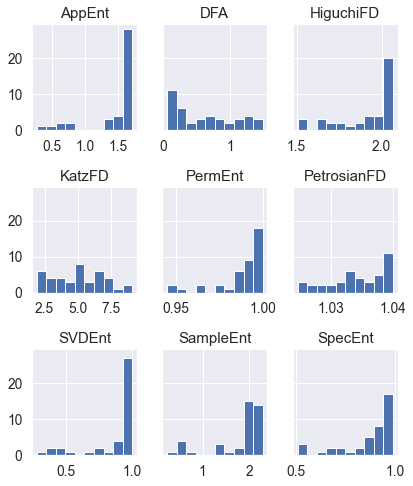

In [5]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

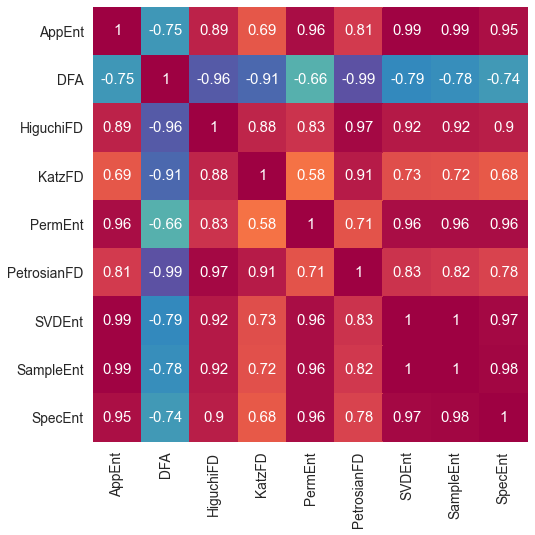

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, 
            cmap='Spectral_r', square=True);

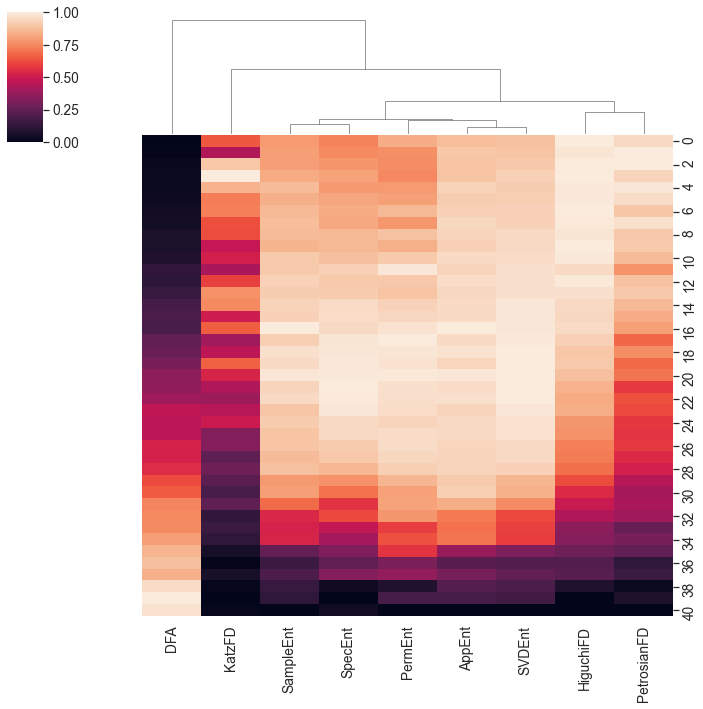

In [7]:
sns.clustermap(df.interpolate(), row_cluster=False, standard_scale=1);